# Algoritmo de Clasificación

 **Consigna:**\
 Desarrollar un Árbol de Decisión de Clasificación con el dataset propuesto para el proyecto final del curso. 

**Recomendaciones:** \
Basarse en los entregables anteriores para la resolución de la presente actividad.
Utilizar los ejemplos vistos y abordados en la sesión, identificando claramente la variable target “y”.
Investigar a fondo sobre la librería Scikit Learn y sus aplicaciones.



In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
from prettytable import PrettyTable
from matplotlib.ticker import FormatStrFormatter

# Gráficos
# ==============================================================================
import matplotlib as mpl            # Matplotlib
import matplotlib.pyplot as plt     # El modulo Pyplot de Matplotlib
import seaborn as sns               # Seaborn
import plotly.express as px

mpl.style.use('bmh')    # Establecemos un nuevo estilo

# Preprocesado y modelado
# ==============================================================================
from sklearn import preprocessing  # Import label encoder
from sklearn.model_selection import train_test_split #Importamos la libreria para separar en train y test
from sklearn.tree import DecisionTreeClassifier #Importamos el modelo
from sklearn.metrics import accuracy_score

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Cargamos el dataset
df = pd.read_csv('../WA_Fn-UseC-HR-Employee-Attrition.csv')
pd.set_option('max_columns', None)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
#df['JobRole'].iloc[[0,1,2,8,9,18,21,22,79]]
df['JobRole'].iloc[60:80]

60       Manufacturing Director
61        Laboratory Technician
62            Research Director
63              Sales Executive
64    Healthcare Representative
65                      Manager
66       Manufacturing Director
67           Research Scientist
68           Research Scientist
69           Research Scientist
70              Sales Executive
71           Research Scientist
72           Research Scientist
73           Research Scientist
74        Laboratory Technician
75       Manufacturing Director
76              Sales Executive
77            Research Director
78            Research Director
79              Human Resources
Name: JobRole, dtype: object

Arrancamos quedandonos con las siguientes: 

1) Numéricas
* Age
* DistanceFromHome
* Education
* JobInvolvement 
* JobLevel 
* RelationshipSatisfaction
* MonthlyIncome
* NumCompaniesWorked
* PerformanceRating
* TotalWorkingYears
* TrainingTimesLastYear
* WorkLifeBalance
* YearsAtCompany
* YearsInCurrentRole 
* YearsSinceLastPromotion

2) Categoricas (que debemos transformar en numerico para el análisis)
* Attrition
* BusinessTravel
* Department
* EducationField
* Gender
* JobRole
* MaritalStatus
* OverTime

Nuestro objetivo es determinar el attrition, asi que es la variable que vamos a tomar como objetivo.

In [4]:
# copiamos el dataset original
df_1 = df.copy()

# Eliminamos las variables que no queriamos
df_1 = df_1.drop(columns=['DailyRate', 'EmployeeCount' , 'EmployeeNumber', 'HourlyRate', 
     'MonthlyRate', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel', 'Over18'])
 

In [5]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   JobInvolvement            1470 non-null   int64 
 10  JobLevel                  1470 non-null   int64 
 11  JobRole                   1470 non-null   object
 12  JobSatisfaction           1470 non-null   int64 
 13  MaritalStatus             1470 non-null   object
 14  MonthlyIncome           

In [6]:
# label_encoder object knows how to understand word labels.
le_Attrition = preprocessing.LabelEncoder()
# Encode labels in column 'Attrition'.
df_1['Attrition']   = le_Attrition.fit_transform(df_1['Attrition'] )

le_BusinessTravel = preprocessing.LabelEncoder()
df_1.BusinessTravel = le_BusinessTravel.fit_transform(df_1.BusinessTravel)

le_Department = preprocessing.LabelEncoder()
df_1.Department     = le_Department.fit_transform(df_1.Department)

le_EducationField = preprocessing.LabelEncoder()
df_1.EducationField = le_EducationField.fit_transform(df_1.EducationField)

le_Gender = preprocessing.LabelEncoder()
df_1.Gender         = le_Gender.fit_transform(df_1.Gender)

le_JobRole = preprocessing.LabelEncoder()
df_1.JobRole        = le_JobRole.fit_transform(df_1.JobRole)

le_MaritalStatus = preprocessing.LabelEncoder()
df_1.MaritalStatus  = le_MaritalStatus.fit_transform(df_1.MaritalStatus)

le_OverTime = preprocessing.LabelEncoder()
df_1.OverTime       = le_OverTime.fit_transform(df_1.OverTime)


# Ejemplo para poder recuperar los nombres categoricos
# >>> list(le.classes_)
# ['amsterdam', 'paris', 'tokyo']
# >>> le.transform(["tokyo", "tokyo", "paris"])
# array([2, 2, 1]...)
# >>> list(le.inverse_transform([2, 2, 1]))
# ['tokyo', 'tokyo', 'paris']

In [7]:
list(le_JobRole.classes_)

['Healthcare Representative',
 'Human Resources',
 'Laboratory Technician',
 'Manager',
 'Manufacturing Director',
 'Research Director',
 'Research Scientist',
 'Sales Executive',
 'Sales Representative']

In [8]:
le_JobRole

LabelEncoder()

In [9]:
df_1.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,2,1,2,1,2,0,3,2,7,4,2,5993,8,1,3,1,8,0,1,6,4,0,5
1,49,0,1,1,8,1,1,3,1,2,2,6,2,1,5130,1,0,4,4,10,3,3,10,7,1,7
2,37,1,2,1,2,2,4,4,1,2,1,2,3,2,2090,6,1,3,2,7,3,3,0,0,0,0
3,33,0,1,1,3,4,1,4,0,3,1,6,3,1,2909,1,1,3,3,8,3,3,8,7,3,0
4,27,0,2,1,2,1,3,1,1,3,1,2,2,1,3468,9,0,3,4,6,3,3,2,2,2,2


**Resolución**: Machine Learning - Modelo de Clasificación

In [10]:
X = df_1.drop("Attrition", axis=1) #Elimino de mi dataset la variable a predecir
y = df_1.Attrition #Defino el Target

In [11]:
#Me quedo con 30% para test y 70% para train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) 

In [12]:
#Creamos el modelo

arbol_de_decision = DecisionTreeClassifier(max_depth=2, random_state = 42) 

In [13]:
#Entrenamos el modelo

arbol_de_decision.fit(X_train,y_train) 

DecisionTreeClassifier(max_depth=2, random_state=42)

In [14]:
#Prediccion en Train
y_train_pred = arbol_de_decision.predict(X_train)

#Prediccion en Test
y_test_pred = arbol_de_decision.predict(X_test) 

In [15]:
#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', round(train_accuracy,3))
print('% de aciertos sobre el set de evaluación:',round(test_accuracy,3))

% de aciertos sobre el set de entrenamiento: 0.858
% de aciertos sobre el set de evaluación: 0.854


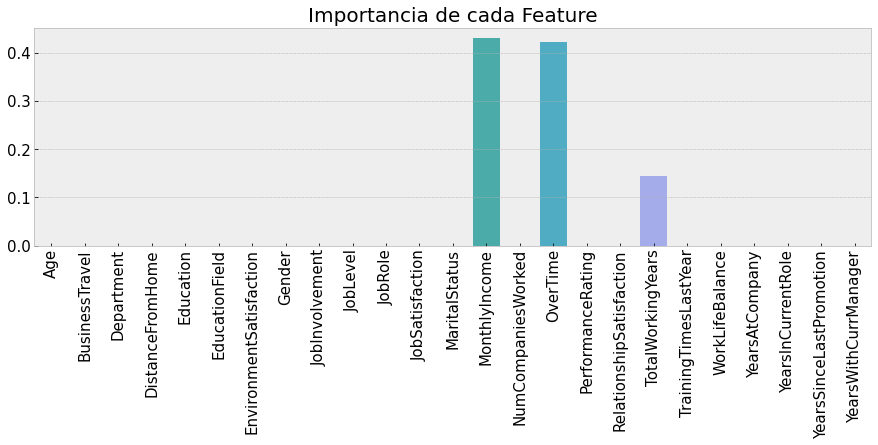

In [16]:
# Graficamos los pesos de las variables

importances = arbol_de_decision.feature_importances_
columns = X.columns

fig, ax = plt.subplots(figsize=(15,4))

sns.barplot(columns, importances)

plt.title('Importancia de cada Feature',fontsize=20)
plt.xticks(rotation = 90, fontsize=15)
plt.yticks(fontsize=15)

plt.show()

* Podemos probar el arbol de desición con menos variables, ya que el grafico de importancia de las variables nos muestra a solo tres variables con algo de importancia.

* Podemos indicar una "feature importance" y una secuencia que creemos que tienen que ser determinantes. 

* Se puede partir el dataseta en otra proporción.
* Se puede cambiar algunos parametros para ver como cambian los resultados, algunos son:
    * **criterion:** ({“gini”, “entropy”}, default=”gini”)
    * **splitter:**:{“best”, “random”}, default=”best”
    * **max_depth:** int default=None \
        The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
    * **max_features:** int, float or {“auto”, “sqrt”, “log2”}, default=None \
      The number of features to consider when looking for the best split:
      

### Probamos:  aumentando la produndidad hasta la ultima hoja

% de aciertos sobre el set de entrenamiento: 1.0
% de aciertos sobre el set de evaluación: 0.81


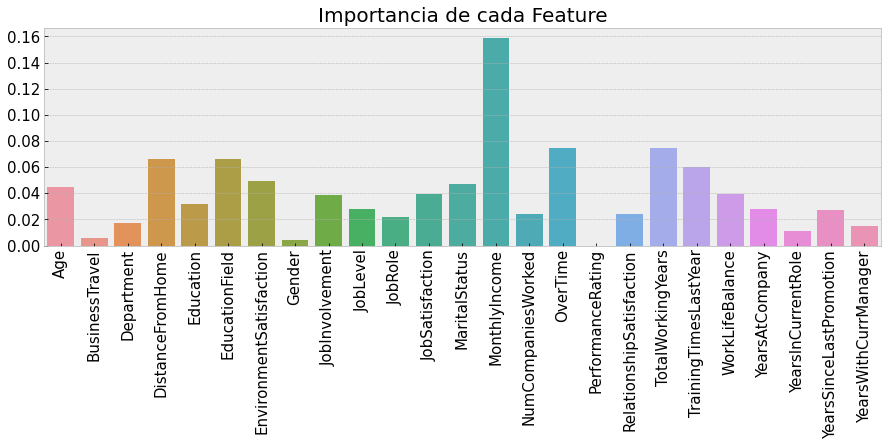

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) #Me quedo con 30% para test y 70% para train
arbol_de_decision = DecisionTreeClassifier(max_depth=None, random_state = 42) #Creamos el modelo
arbol_de_decision.fit(X_train,y_train) #Entrenamos el modelo
y_train_pred = arbol_de_decision.predict(X_train) #Prediccion en Train
y_test_pred = arbol_de_decision.predict(X_test) #Prediccion en Test
train_accuracy = accuracy_score(y_train, y_train_pred) #Calculo el accuracy en Train
test_accuracy = accuracy_score(y_test, y_test_pred) #Calculo el accuracy en Test
print('% de aciertos sobre el set de entrenamiento:', round(train_accuracy,4))
#print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',round(test_accuracy,3))

# Graficamos los pesos de las variables
importances = arbol_de_decision.feature_importances_
columns = X.columns
fig, ax = plt.subplots(figsize=(15,4))
sns.barplot(columns, importances)
plt.title('Importancia de cada Feature',fontsize=20)
plt.xticks(rotation = 90, fontsize=15)
plt.yticks(fontsize=15)

plt.show()

**OBS:** Claramente el valor de Acuracy obtenido para el set de entrenamiento nos indica un overfiting.

### Probamos:  aumentando la produndidad hasta obtener un accuracy del 90%

In [18]:
A_train = []
A_test = []
for i in range(0,25):
    
    if i == 0:
        i = None
    
    # Separamos el dataset, creamos y ejecutamos el modelo
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) #Me quedo con 30% para test y 70% para train
    arbol_de_decision = DecisionTreeClassifier(max_depth=i, random_state = 42) #Creamos el modelo
    arbol_de_decision.fit(X_train,y_train) #Entrenamos el modelo
    y_train_pred = arbol_de_decision.predict(X_train) #Prediccion en Train
    y_test_pred = arbol_de_decision.predict(X_test) #Prediccion en Test
    train_accuracy = accuracy_score(y_train, y_train_pred) #Calculo el accuracy en Train
    test_accuracy = accuracy_score(y_test, y_test_pred) #Calculo el accuracy en Test
    
    # Acumulo los resultados de Accuracy para cada corrida:
    
    A_train.append(train_accuracy)
    A_test.append(test_accuracy)

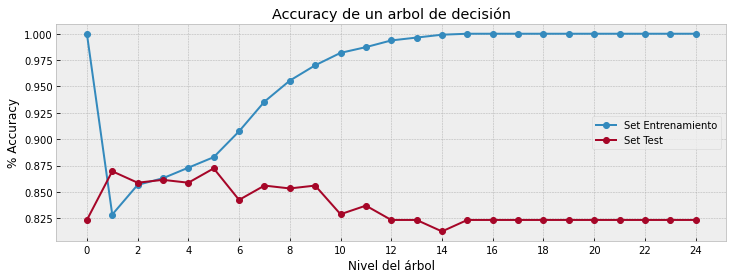

In [19]:
fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(A_train,marker='o', label='Set Entrenamiento')
ax.plot(A_test,marker='o', label='Set Test', color='C1')

ax.set_xlabel('Nivel del árbol')
ax.set_xticks(range(0,26,2))
ax.set_ylabel('% Accuracy')
#ax.set_ylim(0, 1.1)
ax.set_title('Accuracy de un arbol de decisión')
ax.legend()


Aqui vemos como varía el accuracy en función de la profundidad que le damos al arbol. Se observa que una profundidad de 5 es un valor razonable, antes de empezar a perder accuracy en el set de test y posiblemente empezar a overfitear el set de entrenamiento.

% de aciertos sobre el set de entrenamiento: 0.8829
% de aciertos sobre el set de evaluación: 0.872


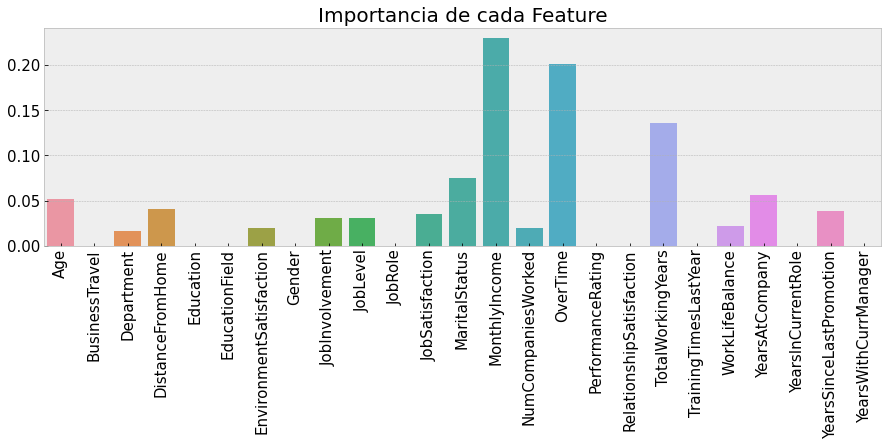

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) #Me quedo con 25% para test y 70% para train
arbol_de_decision = DecisionTreeClassifier(max_depth=5, random_state = 42) #Creamos el modelo
arbol_de_decision.fit(X_train,y_train) #Entrenamos el modelo
y_train_pred = arbol_de_decision.predict(X_train) #Prediccion en Train
y_test_pred = arbol_de_decision.predict(X_test) #Prediccion en Test
train_accuracy = accuracy_score(y_train, y_train_pred) #Calculo el accuracy en Train
test_accuracy = accuracy_score(y_test, y_test_pred) #Calculo el accuracy en Test
print('% de aciertos sobre el set de entrenamiento:', round(train_accuracy,4))
#print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',round(test_accuracy,3))

# Graficamos los pesos de las variables
importances = arbol_de_decision.feature_importances_
columns = X.columns
fig, ax = plt.subplots(figsize=(15,4))
sns.barplot(columns, importances)
plt.title('Importancia de cada Feature',fontsize=20)
plt.xticks(rotation = 90, fontsize=15)
plt.yticks(fontsize=15)

plt.show()

### Probamos:  max_features = 'log2'

% de aciertos sobre el set de entrenamiento: 0.866
% de aciertos sobre el set de evaluación: 0.821


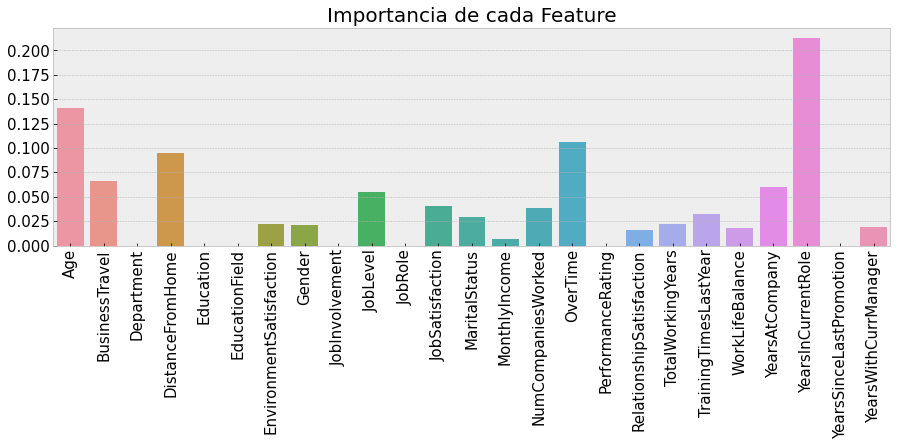

In [21]:
#Me quedo con 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 

#Creamos el modelo
arbol_de_decision = DecisionTreeClassifier(max_depth=5, random_state = 42, max_features = 'log2') 

#Entrenamos el modelo
arbol_de_decision.fit(X_train,y_train) 

#Prediccion en Train
y_train_pred = arbol_de_decision.predict(X_train)

#Prediccion en Test
y_test_pred = arbol_de_decision.predict(X_test) 

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', round(train_accuracy,3))
print('% de aciertos sobre el set de evaluación:',round(test_accuracy,3))

# Graficamos los pesos de las variables
importances = arbol_de_decision.feature_importances_
columns = X.columns

fig, ax = plt.subplots(figsize=(15,4))

sns.barplot(columns, importances)

plt.title('Importancia de cada Feature',fontsize=20)
plt.xticks(rotation = 90, fontsize=15)
plt.yticks(fontsize=15)

plt.show()

### Probamos:  max_features = 'log2'  y  test_size=0.20

% de aciertos sobre el set de entrenamiento: 0.866
% de aciertos sobre el set de evaluación: 0.821


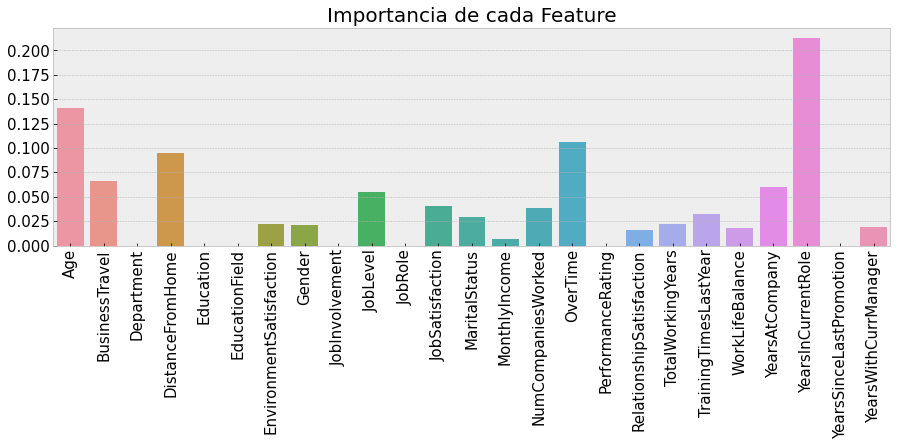

In [22]:
#Me quedo con 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 

#Creamos el modelo
arbol_de_decision = DecisionTreeClassifier(max_depth=5, random_state = 42, max_features = 'log2') 

#Entrenamos el modelo
arbol_de_decision.fit(X_train,y_train) 

#Prediccion en Train
y_train_pred = arbol_de_decision.predict(X_train)

#Prediccion en Test
y_test_pred = arbol_de_decision.predict(X_test) 

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', round(train_accuracy,3))
print('% de aciertos sobre el set de evaluación:',round(test_accuracy,3))

# Graficamos los pesos de las variables
importances = arbol_de_decision.feature_importances_
columns = X.columns

fig, ax = plt.subplots(figsize=(15,4))

sns.barplot(columns, importances)

plt.title('Importancia de cada Feature',fontsize=20)
plt.xticks(rotation = 90, fontsize=15)
plt.yticks(fontsize=15)

plt.show()